In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew
from sklearn.feature_selection import f_classif, mutual_info_classif, chi2
from scipy.stats import kendalltau
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from datetime import datetime
import os
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import StandardScaler
from matplotlib.patches import Rectangle
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from scipy import stats
import missingno as msno
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv('hotel_bookings.csv')

In [3]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
print("Dataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  me

In [5]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   

In [6]:
print("\nMissing Values Count:")
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

missin_value_percent = (data.isnull().sum().sum() / np.product(data.shape) ) * 100
print("\nMissing Values Percentage: " + str(missin_value_percent) + "%")


Missing Values Count:
children         4
country        488
agent        16340
company     112593
dtype: int64

Missing Values Percentage: 3.387663330262166%


<Figure size 1200x600 with 0 Axes>

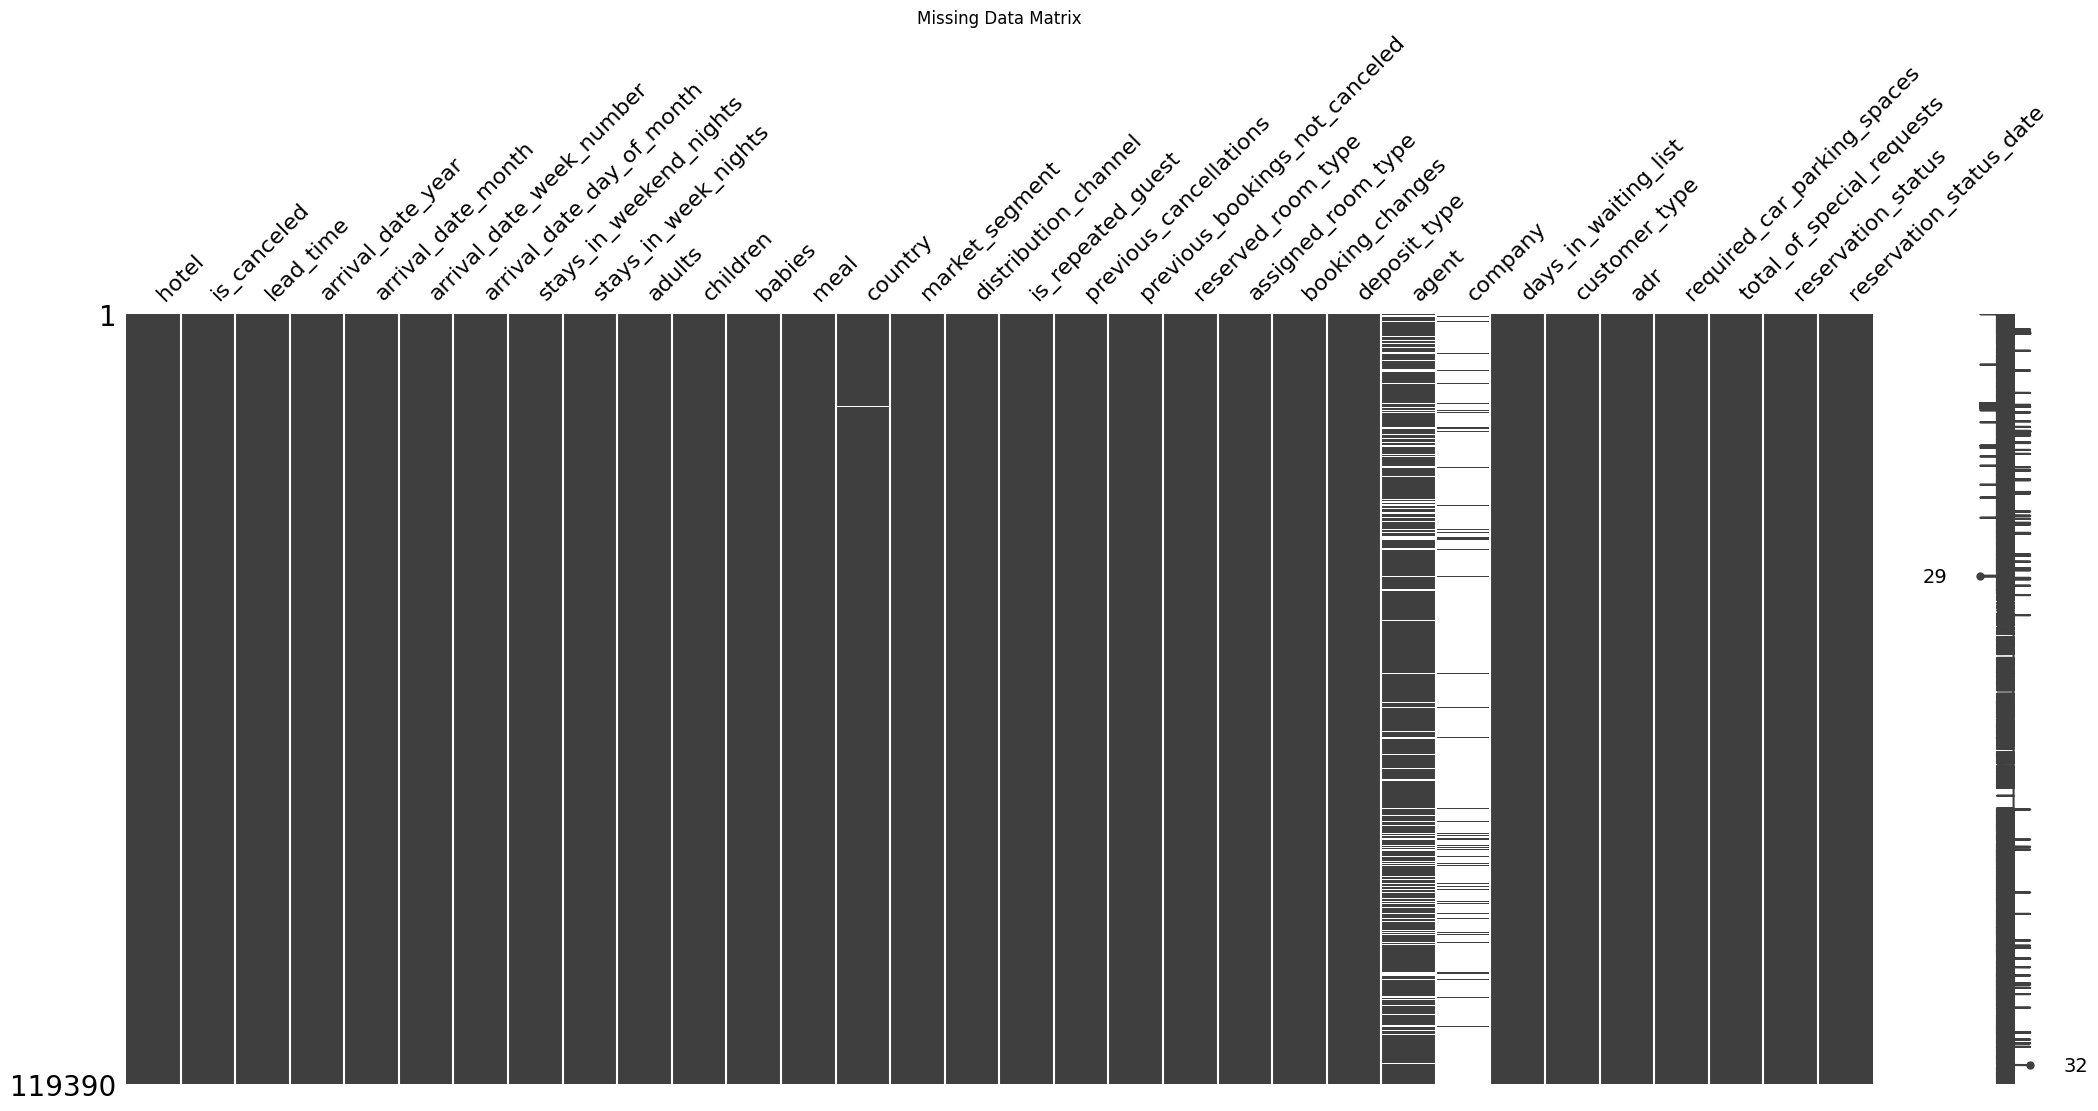

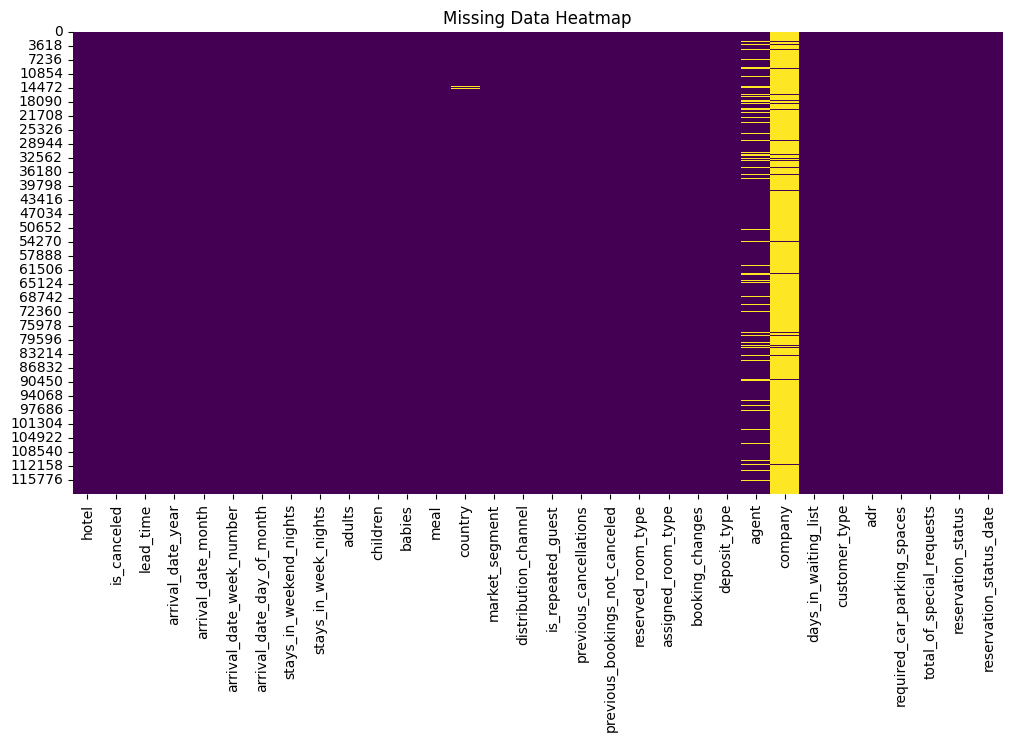

In [7]:
plt.figure(figsize=(12, 6))
msno.matrix(data)
plt.title("Missing Data Matrix")
plt.show()


plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [8]:
plt.style.use('default')
sns.set_palette("husl")

print("DATASET ANALYSIS")
print("="*60)
print("Dataset Info:")
print(f"Shape: {data.shape}")
print(f"Columns: {list(data.columns)}")
print("\nColumn Types:")
print(data.dtypes)
print("="*60)


data_clean = data.drop(columns=['country','reservation_status_date'], axis=1)
# data_clean = data.drop('reservation_status_date', axis=1)


categorical_columns = []
numerical_columns = []

for col in data_clean.columns:
    if data_clean[col].dtype == 'object':
        categorical_columns.append(col)
    else:
        numerical_columns.append(col)

print(f"\nAuto-detected columns:")
print(f"Categorical columns ({len(categorical_columns)}): {categorical_columns}")
print(f"Numerical columns ({len(numerical_columns)}): {numerical_columns}")
print("="*60)


DATASET ANALYSIS
Dataset Info:
Shape: (119390, 32)
Columns: ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']

Column Types:
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_wee


CATEGORICAL COLUMNS ANALYSIS
----------------------------------------


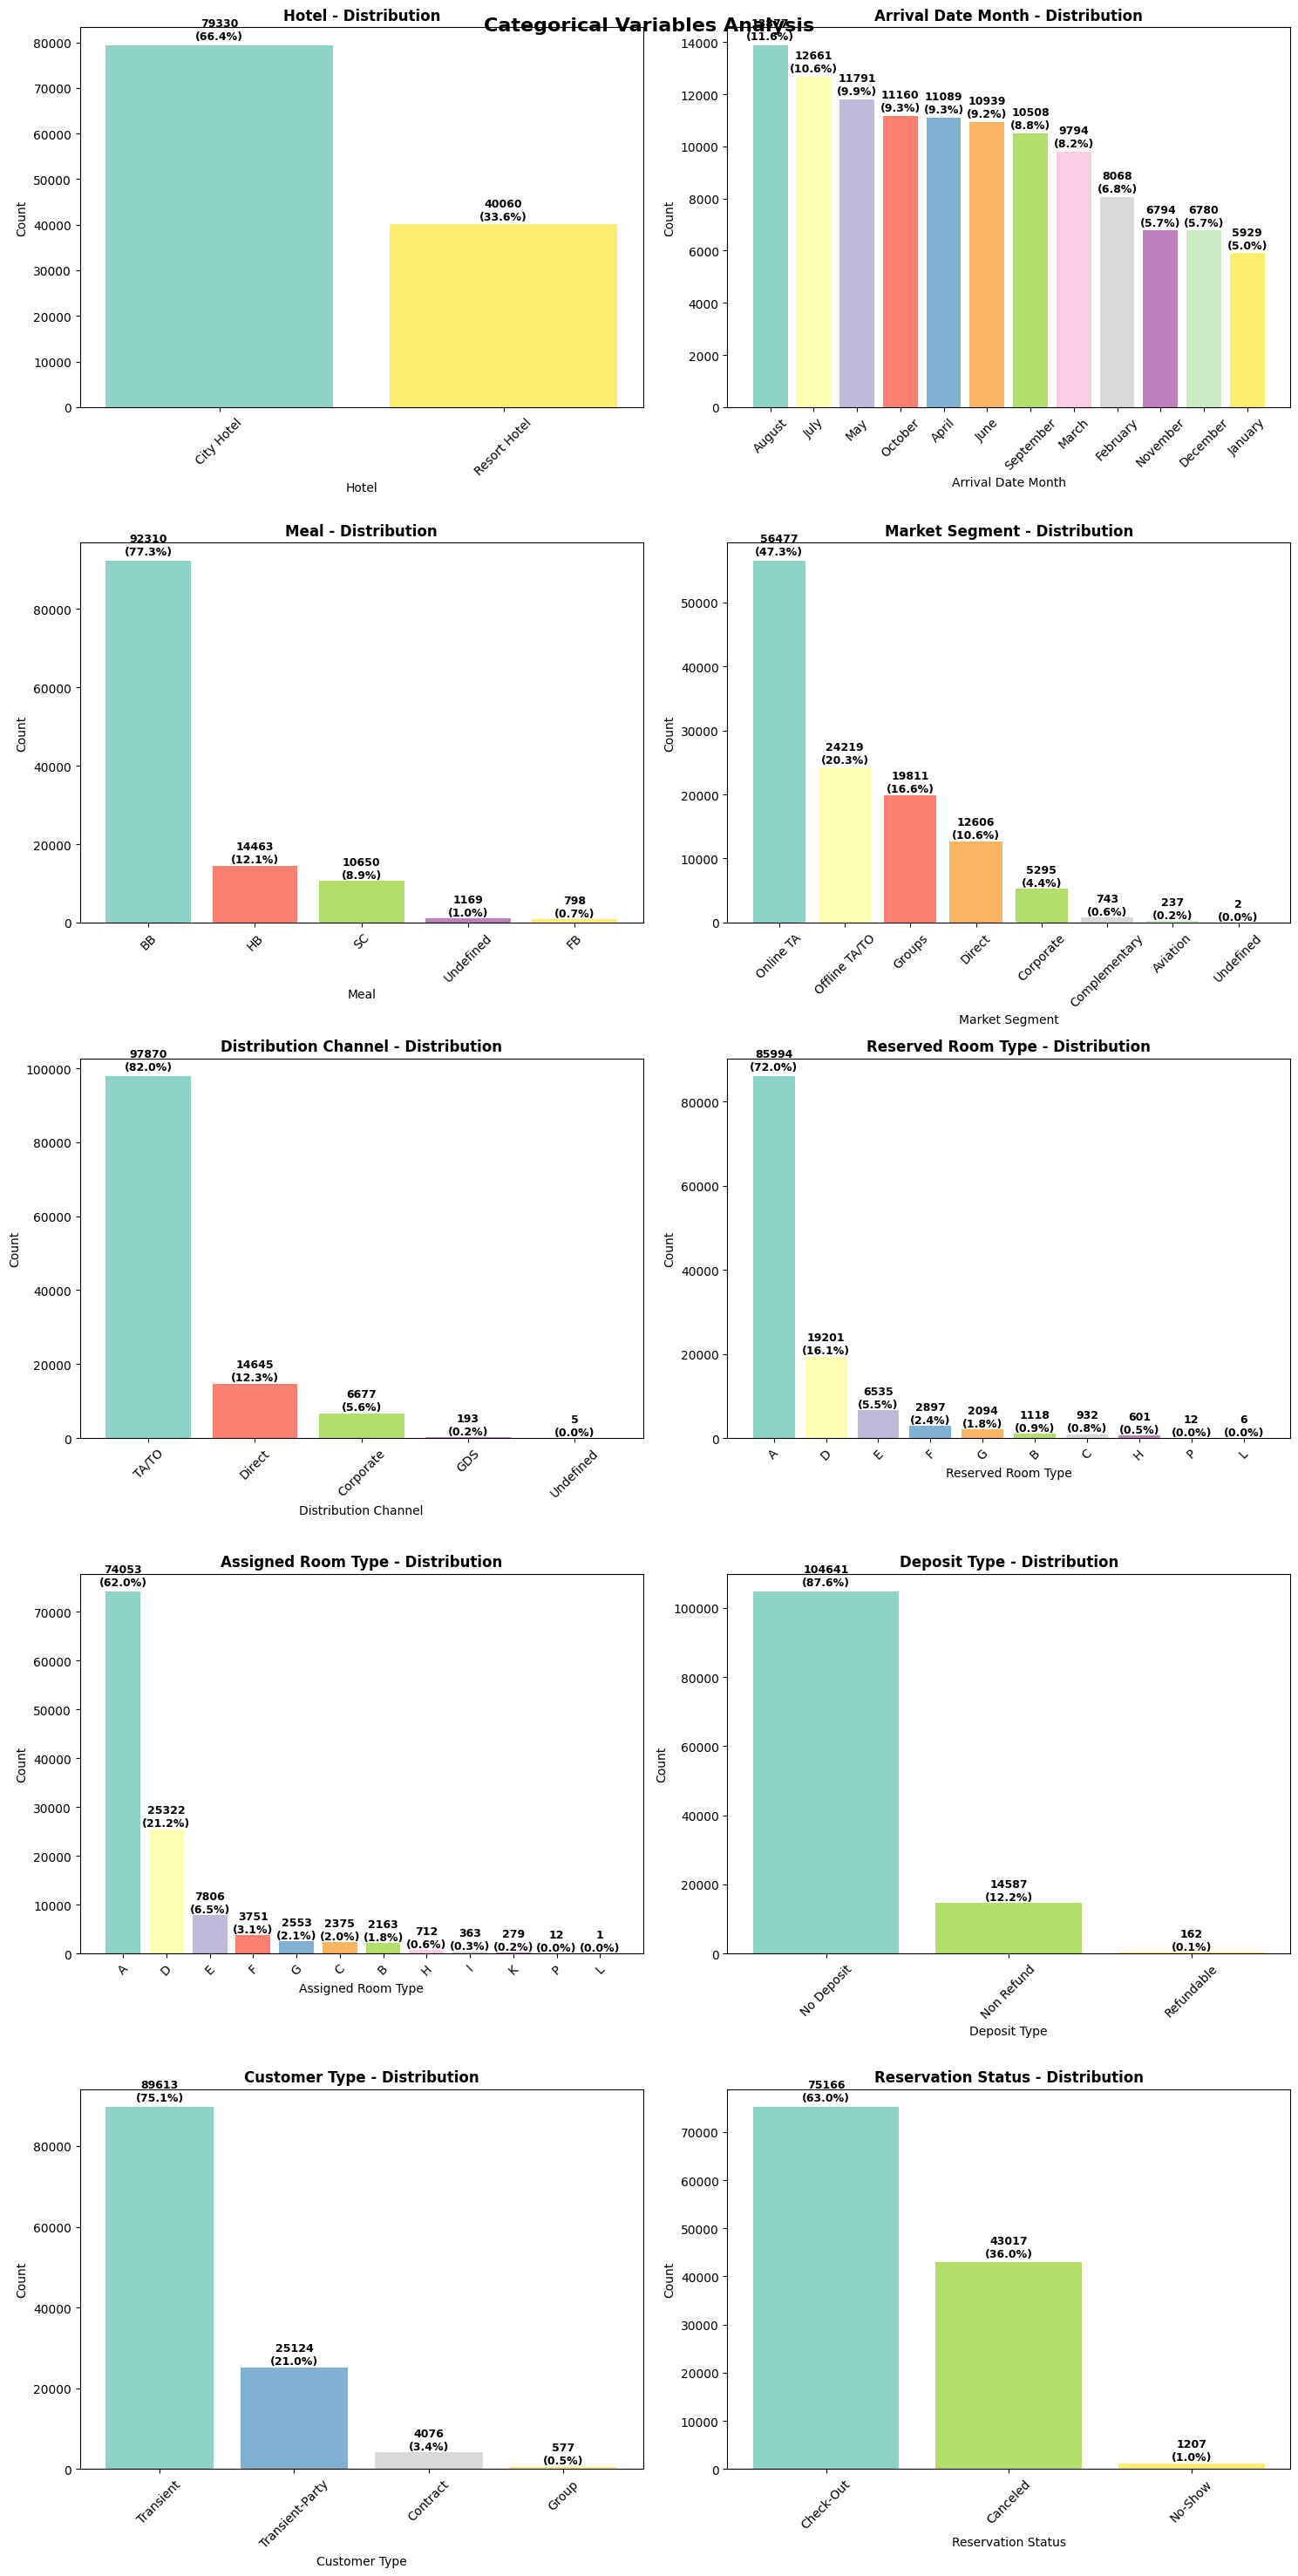

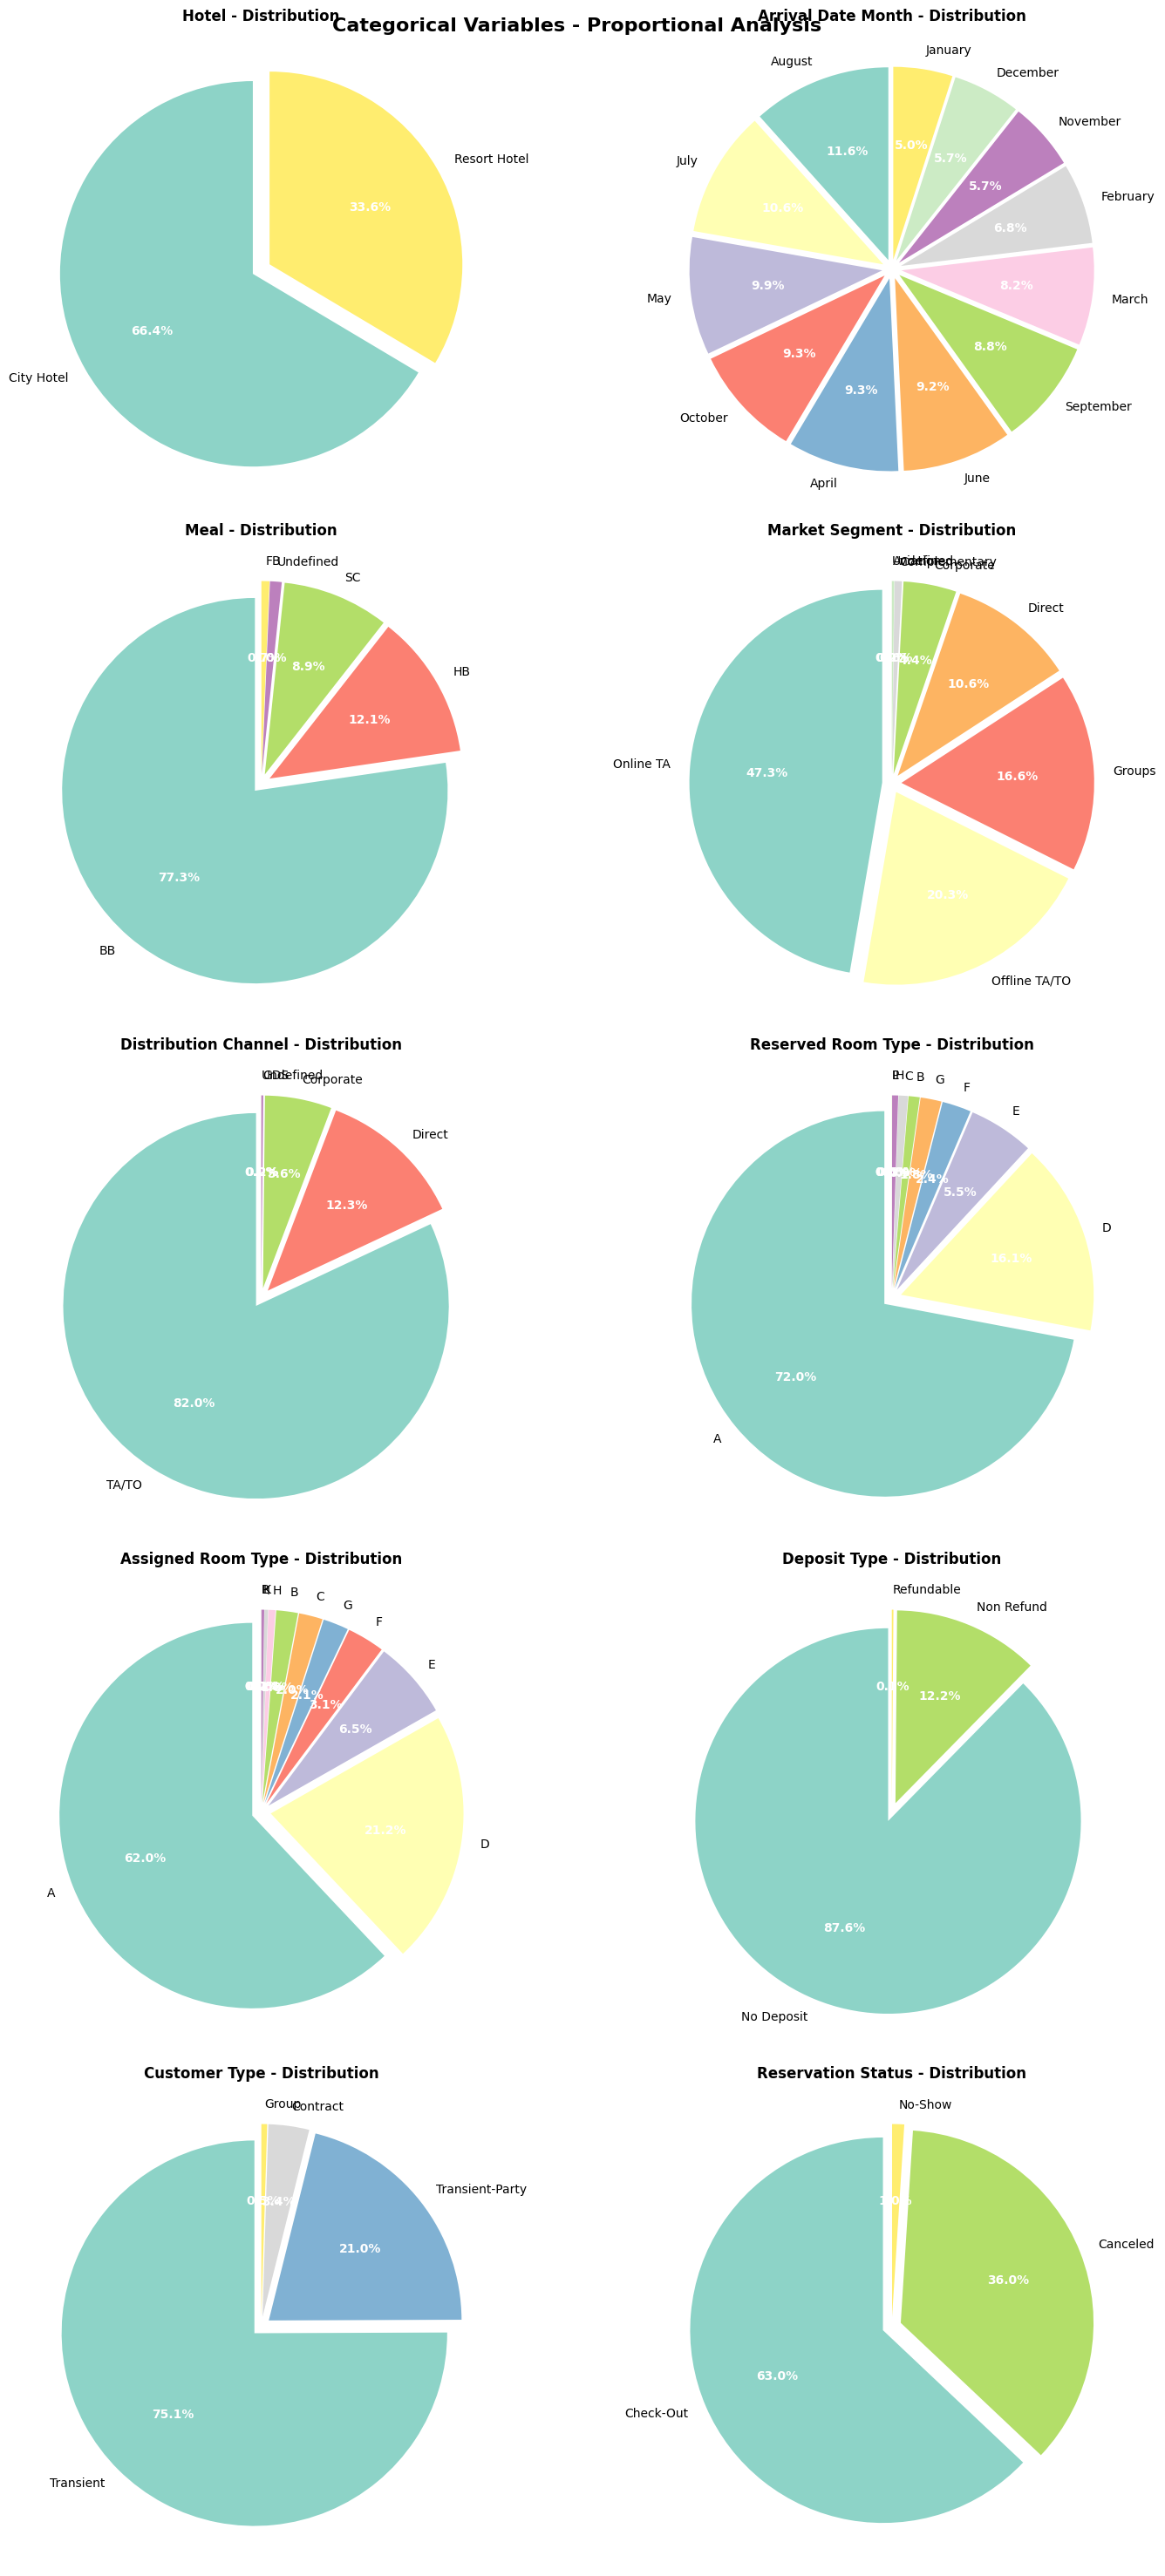


Categorical Variables Summary:

HOTEL:
  City Hotel: 79330 (66.45%)
  Resort Hotel: 40060 (33.55%)

ARRIVAL_DATE_MONTH:
  August: 13877 (11.62%)
  July: 12661 (10.6%)
  May: 11791 (9.88%)
  October: 11160 (9.35%)
  April: 11089 (9.29%)
  June: 10939 (9.16%)
  September: 10508 (8.8%)
  March: 9794 (8.2%)
  February: 8068 (6.76%)
  November: 6794 (5.69%)
  December: 6780 (5.68%)
  January: 5929 (4.97%)

MEAL:
  BB: 92310 (77.32%)
  HB: 14463 (12.11%)
  SC: 10650 (8.92%)
  Undefined: 1169 (0.98%)
  FB: 798 (0.67%)

MARKET_SEGMENT:
  Online TA: 56477 (47.3%)
  Offline TA/TO: 24219 (20.29%)
  Groups: 19811 (16.59%)
  Direct: 12606 (10.56%)
  Corporate: 5295 (4.44%)
  Complementary: 743 (0.62%)
  Aviation: 237 (0.2%)
  Undefined: 2 (0.0%)

DISTRIBUTION_CHANNEL:
  TA/TO: 97870 (81.98%)
  Direct: 14645 (12.27%)
  Corporate: 6677 (5.59%)
  GDS: 193 (0.16%)
  Undefined: 5 (0.0%)

RESERVED_ROOM_TYPE:
  A: 85994 (72.03%)
  D: 19201 (16.08%)
  E: 6535 (5.47%)
  F: 2897 (2.43%)
  G: 2094 (1.75%)
  

In [9]:
if len(categorical_columns) > 0:
    print("\nCATEGORICAL COLUMNS ANALYSIS")
    print("-" * 40)
    
    n_cat_cols = len(categorical_columns)
    cat_rows = (n_cat_cols + 1) // 2
    cat_cols = 2
    
    fig_cat, axes_cat = plt.subplots(cat_rows, cat_cols, figsize=(15, 6*cat_rows))
    fig_cat.suptitle('Categorical Variables Analysis', fontsize=16, fontweight='bold', y=0.98)
    
    if n_cat_cols > 1:
        axes_cat = axes_cat.flatten()
    else:
        axes_cat = [axes_cat]
    
    for i, col in enumerate(categorical_columns):
        if i < len(axes_cat):
            value_counts = data_clean[col].value_counts()
            bars = axes_cat[i].bar(range(len(value_counts)), value_counts.values, 
                                  color=plt.cm.Set3(np.linspace(0, 1, len(value_counts))))
            axes_cat[i].set_title(f'{col.title().replace("_", " ")} - Distribution', 
                                 fontweight='bold', fontsize=12)
            axes_cat[i].set_xlabel(col.title().replace("_", " "))
            axes_cat[i].set_ylabel('Count')
            axes_cat[i].set_xticks(range(len(value_counts)))
            axes_cat[i].set_xticklabels(value_counts.index, rotation=45)
            
            for bar, count in zip(bars, value_counts.values):
                height = bar.get_height()
                axes_cat[i].text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                               f'{count}\n({count/len(data_clean)*100:.1f}%)',
                               ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    for i in range(n_cat_cols, len(axes_cat)):
        axes_cat[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    fig_pie, axes_pie = plt.subplots(cat_rows, cat_cols, figsize=(15, 6*cat_rows))
    fig_pie.suptitle('Categorical Variables - Proportional Analysis', fontsize=16, fontweight='bold', y=0.98)
    
    if n_cat_cols > 1:
        axes_pie = axes_pie.flatten()
    else:
        axes_pie = [axes_pie]
    
    for i, col in enumerate(categorical_columns):
        if i < len(axes_pie):
            value_counts = data_clean[col].value_counts()
            colors = plt.cm.Set3(np.linspace(0, 1, len(value_counts)))
            
            wedges, texts, autotexts = axes_pie[i].pie(value_counts.values, 
                                                      labels=value_counts.index,
                                                      autopct='%1.1f%%',
                                                      colors=colors,
                                                      startangle=90,
                                                      explode=[0.05]*len(value_counts))
            
            axes_pie[i].set_title(f'{col.title().replace("_", " ")} - Distribution', 
                                 fontweight='bold', fontsize=12)
            
            for autotext in autotexts:
                autotext.set_color('white')
                autotext.set_fontweight('bold')
    
    for i in range(n_cat_cols, len(axes_pie)):
        axes_pie[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    print("\nCategorical Variables Summary:")
    for col in categorical_columns:
        print(f"\n{col.upper()}:")
        value_counts = data_clean[col].value_counts()
        percentages = (value_counts / len(data_clean) * 100).round(2)
        for value, count, pct in zip(value_counts.index, value_counts.values, percentages):
            print(f"  {value}: {count} ({pct}%)")
            




NUMERICAL COLUMNS ANALYSIS
----------------------------------------


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


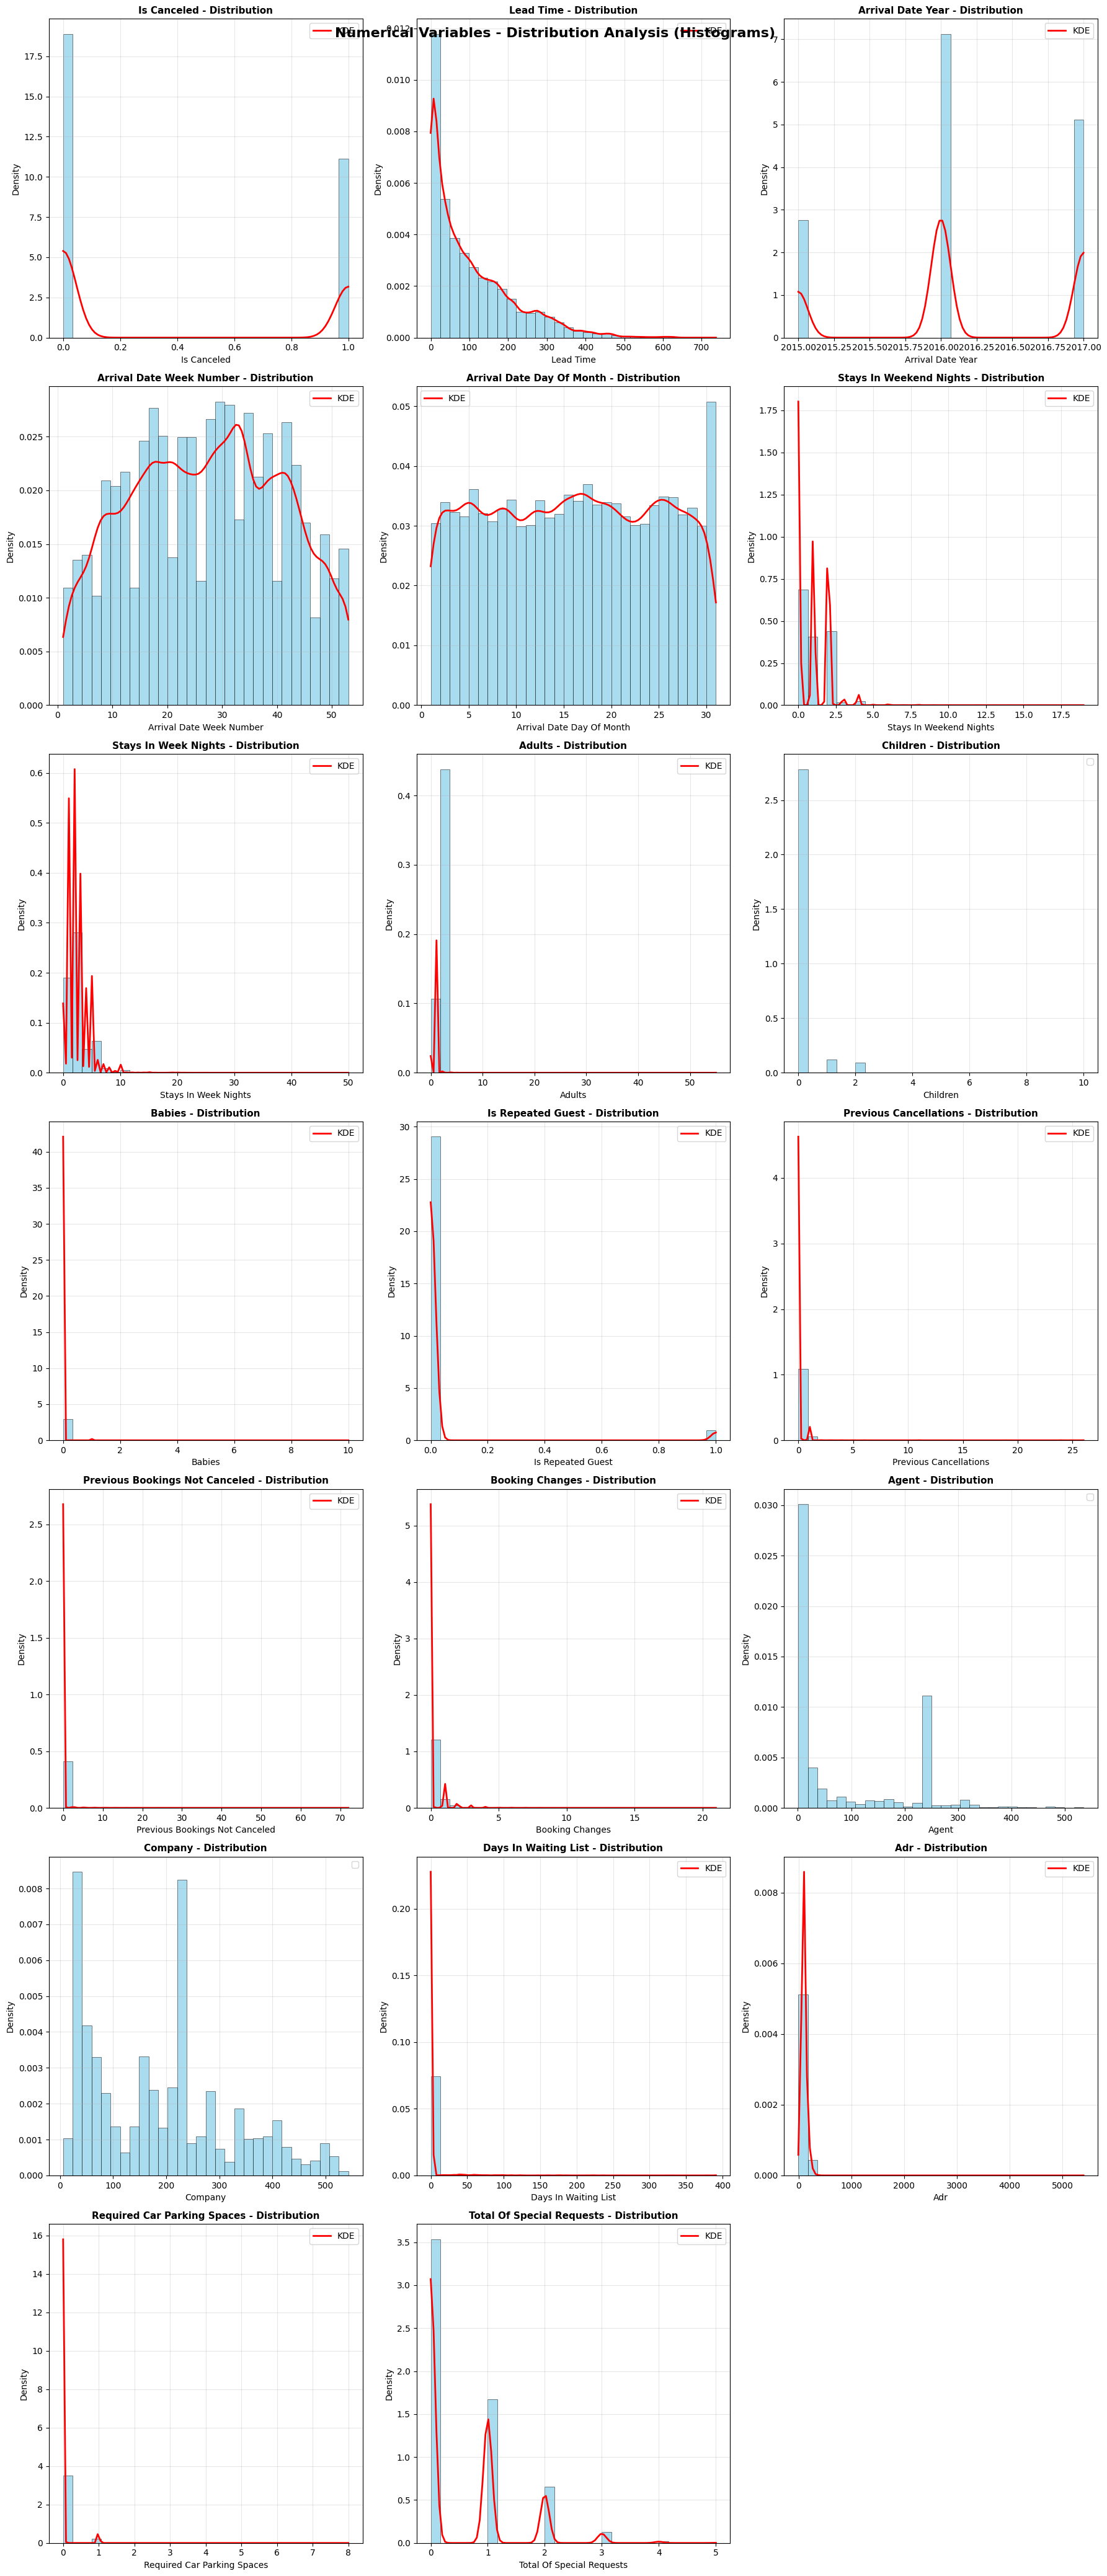

In [10]:
if len(numerical_columns) > 0:
    print("\n\nNUMERICAL COLUMNS ANALYSIS")
    print("-" * 40)
    
    n_num_cols = len(numerical_columns)
    num_rows = (n_num_cols + 2) // 3
    num_cols = 3
    
    fig_hist, axes_hist = plt.subplots(num_rows, num_cols, figsize=(18, 6*num_rows))
    fig_hist.suptitle('Numerical Variables - Distribution Analysis (Histograms)', 
                      fontsize=16, fontweight='bold', y=0.98)
    
    axes_hist = axes_hist.flatten() if n_num_cols > 1 else [axes_hist]
    
    for i, col in enumerate(numerical_columns):
        if i < len(axes_hist):
            axes_hist[i].hist(data_clean[col], bins=30, alpha=0.7, color='skyblue', 
                             density=True, edgecolor='black', linewidth=0.5)
            
            try:
                kde_x = np.linspace(data_clean[col].min(), data_clean[col].max(), 100)
                kde = stats.gaussian_kde(data_clean[col])
                axes_hist[i].plot(kde_x, kde(kde_x), color='red', linewidth=2, label='KDE')
            except:
                pass
            
            axes_hist[i].set_title(f'{col.title().replace("_", " ")} - Distribution', 
                                  fontweight='bold', fontsize=11)
            axes_hist[i].set_xlabel(col.title().replace("_", " "))
            axes_hist[i].set_ylabel('Density')
            axes_hist[i].grid(True, alpha=0.3)
            axes_hist[i].legend()
    
    for i in range(n_num_cols, len(axes_hist)):
        axes_hist[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

In [11]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    outlier_count = len(outliers)
    total_count = len(df[column].dropna())  # Exclude NaN for accurate percentage
    outlier_percentage = (outlier_count / total_count) * 100 if total_count > 0 else 0
    return outlier_count, outlier_percentage

outlier_summary = {}

# Calculate outliers and percentage for each column
for col in numerical_columns:
    count, percentage = detect_outliers_iqr(data, col)
    outlier_summary[col] = {'count': count, 'percentage': percentage}
    
    print(f"\nColumn: {col}")
    print(f"Outliers: {count}")
    print(f"Percentage of Outliers: {percentage:.2f}%")


Column: is_canceled
Outliers: 0
Percentage of Outliers: 0.00%

Column: lead_time
Outliers: 3005
Percentage of Outliers: 2.52%

Column: arrival_date_year
Outliers: 0
Percentage of Outliers: 0.00%

Column: arrival_date_week_number
Outliers: 0
Percentage of Outliers: 0.00%

Column: arrival_date_day_of_month
Outliers: 0
Percentage of Outliers: 0.00%

Column: stays_in_weekend_nights
Outliers: 265
Percentage of Outliers: 0.22%

Column: stays_in_week_nights
Outliers: 3354
Percentage of Outliers: 2.81%

Column: adults
Outliers: 29710
Percentage of Outliers: 24.88%

Column: children
Outliers: 8590
Percentage of Outliers: 7.20%

Column: babies
Outliers: 917
Percentage of Outliers: 0.77%

Column: is_repeated_guest
Outliers: 3810
Percentage of Outliers: 3.19%

Column: previous_cancellations
Outliers: 6484
Percentage of Outliers: 5.43%

Column: previous_bookings_not_canceled
Outliers: 3620
Percentage of Outliers: 3.03%

Column: booking_changes
Outliers: 18076
Percentage of Outliers: 15.14%

Column

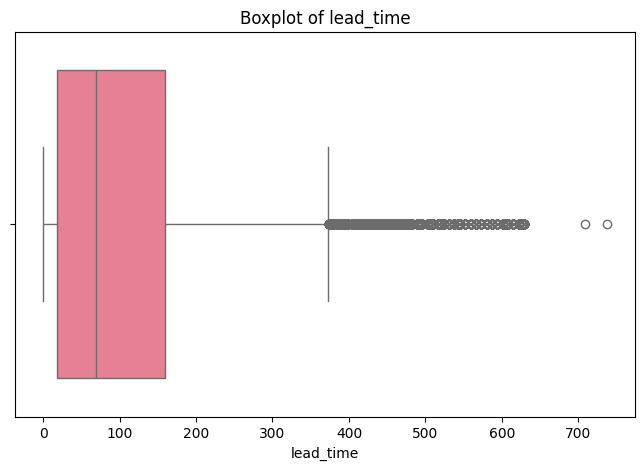

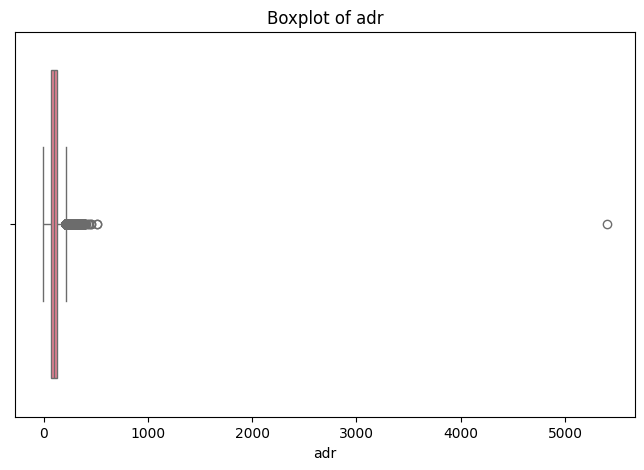

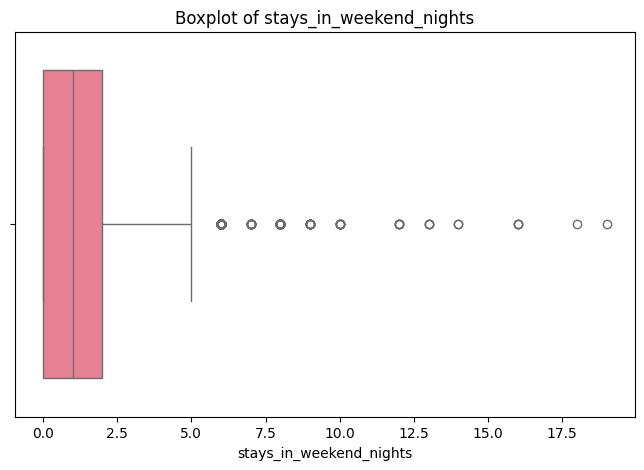

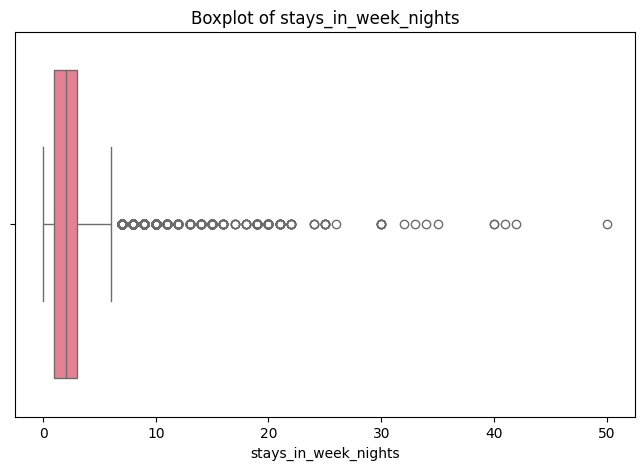

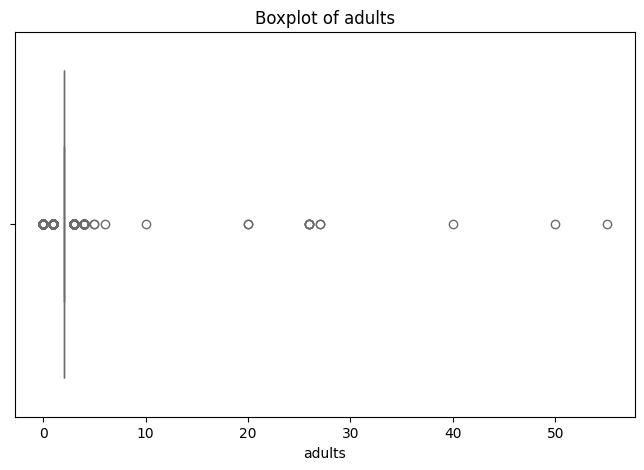

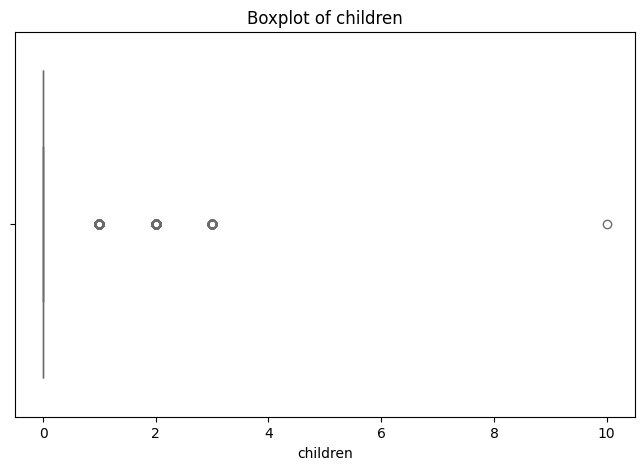

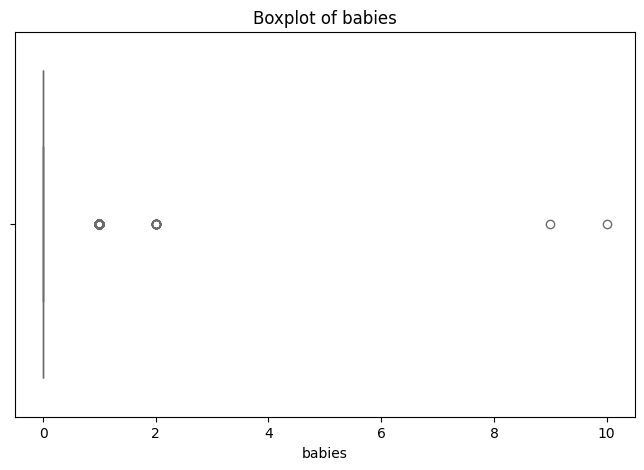

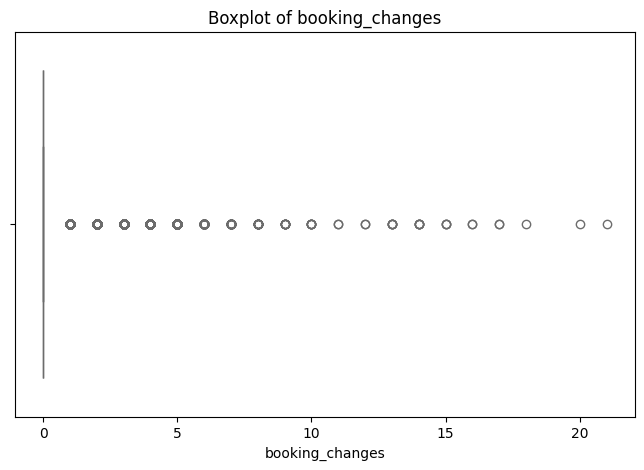

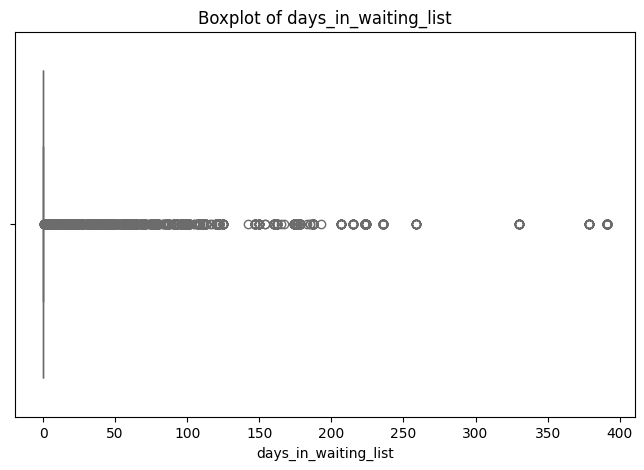

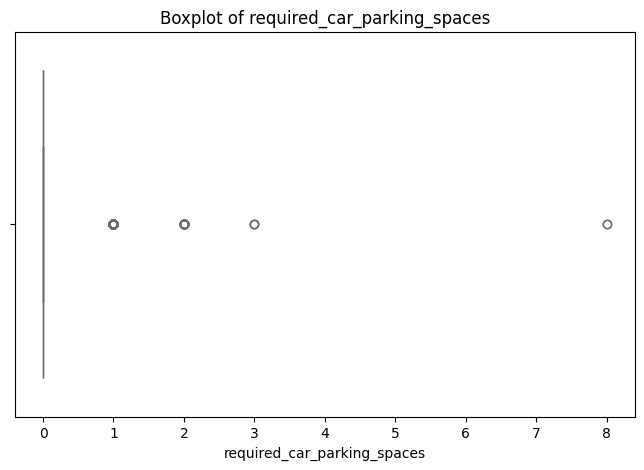

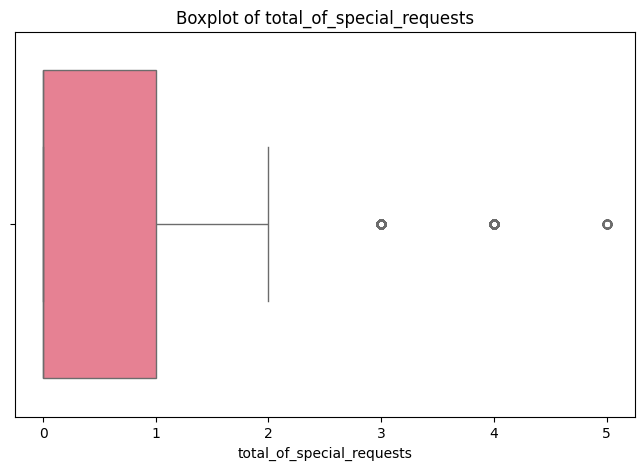

In [12]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    print(f"\nOutliers in {column}: {len(outliers)}")
    return outliers


numerical_columns = [
    'lead_time', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights',
    'adults', 'children', 'babies', 'booking_changes', 'days_in_waiting_list',
    'required_car_parking_spaces', 'total_of_special_requests'
]

# Plot boxplots for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [13]:
print("Number of duplicate rows:", data.duplicated().sum())

Number of duplicate rows: 31994


In [14]:
data.drop_duplicates(inplace=True)

In [15]:
print(data['children'].describe())
print(data['children'].value_counts(dropna=False))

count    87392.000000
mean         0.138640
std          0.455881
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: children, dtype: float64
children
0.0     79028
1.0      4695
2.0      3593
3.0        75
NaN         4
10.0        1
Name: count, dtype: int64


In [16]:
# Children: Impute with mode (0)
data['children'] = data['children'].fillna(0)

In [17]:
print(data['country'].describe())
print(data['country'].value_counts(dropna=False))

count     86944
unique      177
top         PRT
freq      27453
Name: country, dtype: object
country
PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: count, Length: 178, dtype: int64


In [18]:
# Impute with 'Unknown'
data['country'] = data['country'].fillna('Unknown')

In [19]:
print(data['agent'].describe())
print(data['agent'].value_counts(dropna=False))

count    75203.000000
mean        94.138306
std        113.188172
min          1.000000
25%          9.000000
50%         14.000000
75%        240.000000
max        535.000000
Name: agent, dtype: float64
agent
9.0      28759
240.0    13028
NaN      12193
14.0      3349
7.0       3300
         ...  
257.0        1
291.0        1
93.0         1
483.0        1
449.0        1
Name: count, Length: 334, dtype: int64


In [20]:
# Replace missing with 0
data['agent'] = data['agent'].fillna(0)

In [21]:
print(data['company'].describe())
print(data['company'].value_counts(dropna=False))

count    5259.000000
mean      183.081384
std       130.557608
min         6.000000
25%        47.000000
50%       169.000000
75%       263.000000
max       543.000000
Name: company, dtype: float64
company
NaN      82137
40.0       851
223.0      503
45.0       238
153.0      206
         ...  
96.0         1
76.0         1
184.0        1
54.0         1
402.0        1
Name: count, Length: 353, dtype: int64


In [22]:
# Replace missing with 0
data['company'] = data['company'].fillna(0)

In [23]:
print("Missing Values After Imputation:")
print(data[['children', 'country', 'agent', 'company']].isnull().sum())

Missing Values After Imputation:
children    0
country     0
agent       0
company     0
dtype: int64


In [24]:
print(data['reservation_status_date'].head(10))
print(data['reservation_status_date'].dtype)

0     2015-07-01
1     2015-07-01
2     2015-07-02
3     2015-07-02
4     2015-07-03
6     2015-07-03
7     2015-07-03
8     2015-05-06
9     2015-04-22
10    2015-06-23
Name: reservation_status_date, dtype: object
object


In [25]:
print(data[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].head(10))

    arrival_date_year arrival_date_month  arrival_date_day_of_month
0                2015               July                          1
1                2015               July                          1
2                2015               July                          1
3                2015               July                          1
4                2015               July                          1
6                2015               July                          1
7                2015               July                          1
8                2015               July                          1
9                2015               July                          1
10               2015               July                          1


In [26]:
# Convert reservation_status_date to datetime
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

In [27]:
# Map month names to numbers
month_map = {
    'January': '01', 'February': '02', 'March': '03', 'April': '04', 
    'May': '05', 'June': '06', 'July': '07', 'August': '08', 
    'September': '09', 'October': '10', 'November': '11', 'December': '12'
}
data['arrival_date_month_num'] = data['arrival_date_month'].map(month_map)
# Combine year, month, day into a date string
data['arrival_date'] = data['arrival_date_year'].astype(str) + '-' + \
                              data['arrival_date_month_num'] + '-' + \
                              data['arrival_date_day_of_month'].astype(str).str.zfill(2)
# Convert to datetime
data['arrival_date'] = pd.to_datetime(data['arrival_date'], errors='coerce')
# Drop temporary month number column
data = data.drop(columns=['arrival_date_month_num'])


In [28]:

# Verify data types
print("\nData Types After Cleaning:")
print(data[['reservation_status_date', 'arrival_date']].dtypes)

# Check for any invalid dates
print("Invalid arrival dates:", data['arrival_date'].isnull().sum())


Data Types After Cleaning:
reservation_status_date    datetime64[ns]
arrival_date               datetime64[ns]
dtype: object
Invalid arrival dates: 0


# Data Quality Report: Missing Values and Duplicates

## Overview
The dataset initially contained 119,390 rows and 32 columns. Missing values were present in four columns (`children`, `country`, `agent`, `company`), and a significant number of duplicate rows were identified. Below is a summary of the issues and cleaning actions taken.

## Missing Values
Missing values were detected in four columns, with varying degrees of severity. The table below summarizes the issues and cleaning strategies.

| Column     | Missing Count | Missing % | Cleaning Strategy           | Justification                                                                 |
|------------|---------------|-----------|-----------------------------|-------------------------------------------------------------------------------|
| children   | 4             | 0.003%    | Impute with mode (0)        | Only 4 missing values; mode (0) is dominant (79,028/87,392), reflecting most bookings have no children. |
| country    | 488           | 0.409%    | Impute with "Unknown"       | Small missing percentage; "Unknown" avoids bias toward mode (PRT, 27,453 occurrences). |
| agent      | 16,340        | 13.68%    | Replace with 0              | Missing likely indicates direct bookings; 0 is a standard placeholder for no agent. |
| company    | 112,593       | 94.31%    | Replace with 0              | High missing rate suggests non-corporate bookings; 0 distinguishes these cases. |

## Duplicates
- **Issue**: 31,994 duplicate rows were identified (26.79% of the dataset).
- **Cleaning Strategy**: Dropped all exact duplicate rows.
- **Justification**: Duplicates can inflate patterns or skew model training. Removing them ensures each booking is unique, reducing to 87,396 rows.

## Key Observations
- **Missing Values**: The low missing percentages for `children` and `country` made imputation straightforward, while high missingness in `company` (94.31%) suggests it’s mostly inapplicable. `agent` (13.68%) missingness is moderate and aligns with direct bookings.
- **Duplicates**: The high number of duplicates (31,994) indicates potential data entry or collection issues, significantly impacting dataset size after removal.
- **Impact**: Cleaning ensures no missing values remain and reduces redundancy, improving data reliability for analysis.

In [29]:
numerical_columns = [
    'lead_time', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights',
    'adults', 'children', 'babies', 'booking_changes', 'days_in_waiting_list',
    'required_car_parking_spaces', 'total_of_special_requests'
]

# Define specific caps based on domain knowledge
specific_caps = {
    'adr': (0, 1000),  # rates invalid, cap high at 1000
    'adults': (0, 3),  # cap at 3 for realistic group size
    'children': (0, 5),  # cap at 5 for family bookings
    'babies': (0, 5),  # cap at 5 for realistic counts
    'booking_changes': (0, 5),  # cap at 5 for reasonable changes
    'required_car_parking_spaces': (0, 3),  # cap at 3 for groups
    'days_in_waiting_list': (0, 30),  # cap at ~1 month
    'stays_in_week_nights': (0, 14),  # cap at ~2 weeks
    'stays_in_weekend_nights': (0, 7),  # cap at ~1 month weekends
    'lead_time': (0, 730),  # cap at 2 years
    'total_of_special_requests': (0, 5)  # max is already 5
}

# Function to cap outliers
def cap_outliers(df, column, lower_cap, upper_cap):
    initial_outliers = df[(df[column] < lower_cap) | (df[column] > upper_cap)][column].count()
    df[column] = df[column].clip(lower=lower_cap, upper=upper_cap)
    print(f"{column}: Capped {initial_outliers} values at [{lower_cap}, {upper_cap}]")
    return df

# Apply capping to numerical columns
for col in numerical_columns:
    # Use specific caps if defined, otherwise use 1st/99th percentiles
    if col in specific_caps:
        lower_cap, upper_cap = specific_caps[col]
    else:
        lower_cap = data[col].quantile(0.01)
        upper_cap = data[col].quantile(0.99)
    data = cap_outliers(data, col, lower_cap, upper_cap)

# Verify changes by comparing summary statistics
print("\nSummary Statistics After Capping Outliers:")
print(data[numerical_columns].describe())

lead_time: Capped 1 values at [0, 730]
adr: Capped 2 values at [0, 1000]
stays_in_weekend_nights: Capped 92 values at [0, 7]
stays_in_week_nights: Capped 198 values at [0, 14]
adults: Capped 76 values at [0, 3]
children: Capped 1 values at [0, 5]


babies: Capped 2 values at [0, 5]
booking_changes: Capped 145 values at [0, 5]
days_in_waiting_list: Capped 661 values at [0, 30]
required_car_parking_spaces: Capped 2 values at [0, 3]
total_of_special_requests: Capped 0 values at [0, 5]

Summary Statistics After Capping Outliers:
          lead_time           adr  stays_in_weekend_nights  \
count  87396.000000  87396.000000             87396.000000   
mean      79.891288    106.286974                 1.002883   
std       86.051717     52.105745                 1.012352   
min        0.000000      0.000000                 0.000000   
25%       11.000000     72.000000                 0.000000   
50%       49.000000     98.100000                 1.000000   
75%      125.000000    134.000000                 2.000000   
max      730.000000   1000.000000                 7.000000   

       stays_in_week_nights        adults      children        babies  \
count          87396.000000  87396.000000  87396.000000  87396.000000   
mean         

In [30]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    outlier_count = len(outliers)
    total_count = len(df[column].dropna())  # Exclude NaN for accurate percentage
    outlier_percentage = (outlier_count / total_count) * 100 if total_count > 0 else 0
    return outlier_count, outlier_percentage

outlier_summary = {}

# Calculate outliers and percentage for each column
for col in numerical_columns:
    count, percentage = detect_outliers_iqr(data, col)
    outlier_summary[col] = {'count': count, 'percentage': percentage}
    
    print(f"\nColumn: {col}")
    print(f"Outliers: {count}")
    print(f"Percentage of Outliers: {percentage:.2f}%")


Column: lead_time
Outliers: 2396
Percentage of Outliers: 2.74%

Column: adr
Outliers: 2490
Percentage of Outliers: 2.85%

Column: stays_in_weekend_nights
Outliers: 220
Percentage of Outliers: 0.25%

Column: stays_in_week_nights
Outliers: 1531
Percentage of Outliers: 1.75%

Column: adults
Outliers: 22899
Percentage of Outliers: 26.20%

Column: children
Outliers: 8364
Percentage of Outliers: 9.57%

Column: babies
Outliers: 914
Percentage of Outliers: 1.05%

Column: booking_changes
Outliers: 15902
Percentage of Outliers: 18.20%

Column: days_in_waiting_list
Outliers: 860
Percentage of Outliers: 0.98%

Column: required_car_parking_spaces
Outliers: 7313
Percentage of Outliers: 8.37%

Column: total_of_special_requests
Outliers: 2673
Percentage of Outliers: 3.06%


# Data Quality Report: Outliers

## Overview
Outliers were analyzed in 11 numerical columns using the IQR method, revealing varying percentages of extreme values. These were capped to prevent skewing future models. The table below summarizes the outlier issues, cleaning strategies, and justifications based on summary statistics and domain knowledge.

## Outlier Handling
| Column                     | Outlier % (IQR) | Min   | Max   | Cap (Lower, Upper) | Justification                                                                 |
|----------------------------|-----------------|-------|-------|--------------------|-------------------------------------------------------------------------------|
| lead_time                  | 2.52%           | 0     | 737   | (0, 730)           | Caps at 2 years; max 737 is high but plausible; 730 aligns with domain limits. |
| adr                        | 3.18%           | -6.38 | 5400  | (0, 1000)          | Negative rates invalid; 5400 is extreme; cap at 1000 handles luxury outliers.  |
| stays_in_weekend_nights    | 0.22%           | 0     | 19    | (0, 7)             | Caps at ~1 month of weekends; max 19 is rare, median 1 suggests short stays.   |
| stays_in_week_nights       | 2.81%           | 0     | 50    | (0, 14)            | Caps at ~2 weeks; max 50 is high, median 2 indicates typical short stays.     |
| adults                     | 24.88%          | 0     | 55    | (0, 3)             | High outlier % due to strict IQR; cap at 3 for realistic individual bookings.  |
| children                   | 7.20%           | 0     | 10    | (0, 5)             | Caps at 5 for families; max 10 is rare (1 occurrence), median 0 is dominant.  |
| babies                     | 0.77%           | 0     | 10    | (0, 5)             | Caps at 5; max 10 is unlikely, median 0 shows babies are rare.                |
| booking_changes            | 15.14%          | 0     | 21    | (0, 5)             | Caps at 5; high outlier % due to skewed data, median 0 is common.             |
| days_in_waiting_list       | 3.10%           | 0     | 391   | (0, 30)            | Caps at ~1 month; max 391 is extreme, median 0 indicates rare waits.          |
| required_car_parking_spaces| 6.21%           | 0     | 8     | (0, 3)             | Caps at 3 for groups; max 8 is high, median 0 shows parking is uncommon.      |
| total_of_special_requests  | 2.41%           | 0     | 5     | (0, 5)             | Max is 5, already reasonable; cap ensures consistency.                        |

## Key Observations
- **High Outlier Percentages**: `adults` (24.88%) and `booking_changes` (15.14%) had high outlier rates due to skewed distributions and strict IQR thresholds. Capping at 3 and 5, respectively, aligns with realistic booking scenarios.
- **Extreme Values**: `adr` (max 5400, negative -6.38) and `days_in_waiting_list` (max 391) showed unrealistic extremes, addressed by domain-specific caps.
- **Cleaning Impact**: Capping preserves all rows while mitigating extreme values, ensuring robust data for modeling. The 99th percentile was used as a fallback, but specific caps were chosen for domain relevance (e.g., `adr` at 1000, `adults` at 3).
- **Justification**: Capping over removal avoids data loss, critical for a large dataset. Thresholds balance realism (e.g., 3 adults, 14 nights) with statistical robustness.

In [31]:
data['total_guests'] = data['adults'] + data['children'] + data['babies']
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data['is_family'] = (data['children'] + data['babies'] > 0).astype(int)

In [32]:
low_cardinality_cols = [
    'hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel',
    'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type'
]

country_freq = data['country'].value_counts(normalize=True)
threshold = 0.01 
infrequent_countries = country_freq[country_freq < threshold].index
data['country'] = data['country'].apply(lambda x: 'Other' if x in infrequent_countries else x)
low_cardinality_cols.append('country')

# Apply One-Hot Encoding
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
encoded_df = pd.DataFrame(encoder.fit_transform(data[low_cardinality_cols]), 
                          columns=encoder.get_feature_names_out(low_cardinality_cols),
                          index=data.index)
# Concatenate encoded columns back to data and drop originals
data = pd.concat([data.drop(low_cardinality_cols, axis=1), encoded_df], axis=1)

In [33]:
# Remove Data Leakage Columns
leakage_cols = ['reservation_status', 'reservation_status_date']
data = data.drop(columns=leakage_cols, errors='ignore')

In [34]:
data.to_csv('hotel_bookings_cleaned.csv', index=False)

In [35]:
X = data.drop('is_canceled', axis=1)  # Features
y = data['is_canceled']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify shapes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (69916, 89)
X_test shape: (17480, 89)
y_train shape: (69916,)
y_test shape: (17480,)
